### 다항회귀분석 
- 단순 회귀 분석은 두 변수 간의 관계를 직선 형태로 설명하는 알고리즘 
- 곡선으로 설명하는 것이 적합할 때는 단순회귀분석이 부적합 
- 다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선 표현 가능
- 종속 변수 Y와 독립 변수 X의 관계 : Y = aX^2 + bX + c 

In [1]:
### 데이터 준비
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

path = '../data/auto-mpg.csv'
df = pd.read_csv(path, header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X = ndf[['weight']] # 독립 변수 X
Y = ndf['mpg']      # 종속 변수 Y 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 10)

print('train data : ', X_train.shape)
print('test data : ', X_test.shape)                                                            

train data :  (274, 1)
test data :  (118, 1)


### 모형 학습 및 검증 
- 선형회귀분석 위한 LinearRegression() 함수와 다항식 변환을 위한 PolynomialFeatures() 함수를 불러옴 
- PolynomialFeatures(degree = 2) 옵션으로 2차항 객체인 poly 생성 

In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train) 

print('원 데이터 : ', X_train.shape)
print('2차항 변환 데이터 : ', X_train_poly.shape)

원 데이터 :  (274, 1)
2차항 변환 데이터 :  (274, 3)


In [4]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)

r_square

0.708700926297548

- 훈련 데이터의 분포와 학습된 모형의 회귀선을 그래프로 출력
- 2차항으로 변환된 검증 데이터(X_test_poly)를 predict() 메소드에 입력

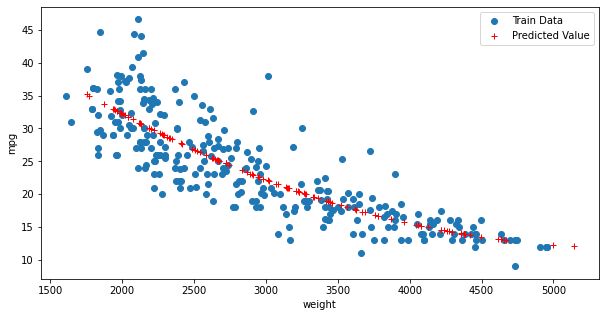

In [5]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10,5 )) 
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label = 'Train Data')
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


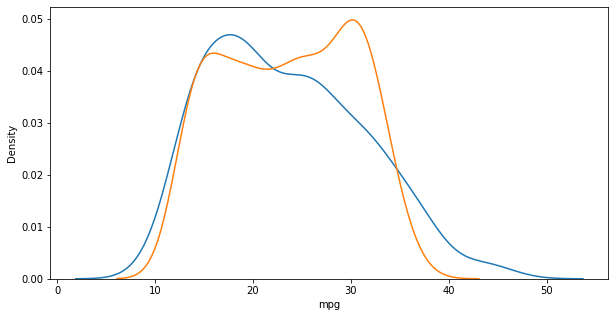

In [9]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label = "y_hat", ax = ax1)
plt.show()
plt.close()